# Methoden en Technieken -- Blok 1

## Datapunt Opdracht

In deze opdracht worden de volgende leeruitkomsten getoetst, relevante termen zijn **dik** gedrukt:
- A2: Je stelt voor een AI-oplossing juridische, ethische, organisatorische, **functionele en
technische requirements** op.
- B1: Je **verkent en prepareert een dataset voor het trainen en testen van een AI-model** en
kan de voor- en nadelen van het gebruik van een bestaande dataset onderbouwen, rekening
houdend met technische en ethische randvoorwaarden.
- B2: Je **stelt op basis van requirements en data een geschikte architectuur voor een AI-
oplossing op en selecteert daarvoor passende AI-technieken gebruik makend van bijvoorbeeld
machine learning, deep learning**, kennisrepresentatie, computer vision en natural language
processing.
- B3: Je **ontwikkelt een nieuw** of voorgetraind **AI-model** volgens een iteratief en systematisch
proces.
- C2: **Je evalueert en beoordeelt de kwaliteit van een AI-model aan de hand van kwaliteitscriteria die in het vakgebied erkend worden** zoals robustness, **performance**, scalability,
explainability, **model complexity** en resource demand.

Dit is een individuele opdracht. Het is toegestaan met elkaar de opdracht te bespreken, maar iedereen schrijft zijn eigen code en antwoorden. Mocht je code van het internet hebben overgenomen/aangepast, vermeld dan de bron in het commentaar. Het gebruik van generatieve AI (Chat-GPT, etc...) is *alleen* toegestaan bij de voorbereiding op de opdracht. Denk hierbj aan activiteiten zoals brainstormen, of het maken van een plan. Het is niet toegestaan code of tekst van generative AI over te nemen. (Level 2 van de AI Assessment Scale)


Dit volgende code leest de data in, het bestand **Visegrad2020.csv** is samen met deze opdracht te vinden op DLO.

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Visegrad2020.csv', index_col=0)

In deze opdracht ga je een model maken om de sector (kolom $S$, 6 klassen) te voorspellen a.d.h.v. de verklarende variabelen $X_1$ t/m $X_{82}$. Doel is hier niet om een interpreteerbaar model te maken, maar mocht je geïnteresseerd zijn in de herkomst van de data en de betekenis van de variabelen dan is dit te vinden op [https://archive.ics.uci.edu/dataset/830/visegrad+group+companies+data-2](https://archive.ics.uci.edu/dataset/830/visegrad+group+companies+data-2).

Het doel van deze opdracht is niet zo zeer om een zo goed mogelijk model op te leveren, maar te laten zien dat je al je keuzes in de modellering en evaluatie kan toelichten, verantwoorden, en correct kan toepassen.

### De opdracht

#### Deel A

Verken de data, en voer eventuele datapreparatie uit, leg kort uit wat je opvalt.

In [72]:
# Jouw code hier, voeg indien gewenst extra code cellen toe

data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,S
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
73,0.01,0.71,0.08,1.13,0.11,0.02,0.42,1.66,0.29,0.02,0.03,0.03,0.01,0.06,1.42,0.03,0.01,0.02,0.00,0.19,0.05,-5.33,0.25,5.15,0.40,0.07,2.71,2.33,0.00,1.66,6.40,0.39,0.0,0.12,0.01,0.16,1.05,0.04,0.03,0.97,0.61,0.92,1.23,11102.07,0.03,0.34,34.34,2.93,2.73,5.16,0.02,0.68,2.11,0.01,0.01,0.02,0.12,0.02,-0.91,0.02,0.59,0.0,0.01,0.00,0.00,570.32,9146.18,3826.90,8621.70,168.18,523.84,0.89,0.89,0.96,0.98,1.33,2.02,0.84,0.97,0.92,-0.10,0.13,1
139,0.07,0.63,0.18,1.32,0.08,0.10,0.60,3.09,0.37,0.10,0.17,0.04,0.03,0.19,1.60,0.16,0.03,0.10,0.02,0.30,0.16,-18.12,0.71,4.31,0.20,0.27,5.31,4.78,3.09,3.09,9.76,0.44,1.0,0.24,0.03,0.58,1.09,0.12,0.04,1.19,0.56,1.46,1.71,3674.00,0.20,0.17,23.91,6.40,5.48,12.07,0.02,1.60,0.50,0.05,0.02,0.07,0.74,0.08,1.34,0.06,0.47,0.0,0.01,0.00,0.06,1023.07,3886.33,3122.01,3857.90,382.05,1494.84,1.04,1.03,1.31,1.44,1.47,5.64,3.32,1.27,1.36,5.19,-0.50,1
175,0.06,0.52,0.05,1.14,0.05,0.08,0.92,1.80,0.48,0.11,0.23,0.10,0.06,0.34,1.92,0.20,0.05,0.11,0.03,0.43,0.30,-4.47,0.08,4.40,0.29,0.22,4.90,3.31,1.80,1.82,1.80,0.65,1.0,0.12,0.06,0.65,0.87,0.19,0.11,0.77,0.35,0.80,1.08,1209.00,0.13,0.35,18.99,6.88,5.13,3.00,-0.03,0.74,1.15,0.08,0.05,0.16,0.50,0.24,-4.77,0.21,0.80,0.0,0.01,0.00,0.00,711.27,4163.50,1778.37,3245.60,341.42,568.24,1.00,0.93,0.92,0.82,6.30,-778.70,0.97,0.88,0.73,0.80,-0.58,1
290,0.22,0.30,0.41,2.98,0.22,0.29,2.26,2.28,0.68,0.29,1.38,0.14,0.14,1.06,3.31,0.91,0.13,0.27,0.10,0.46,0.85,-48.61,1.08,3.55,0.07,0.40,9.71,6.68,0.00,2.29,6.42,0.78,0.0,0.92,0.12,17.60,2.92,0.31,0.14,2.05,0.21,1.79,2.03,1455.37,0.32,0.14,181.75,5.52,11.00,5.99,0.20,1.92,0.30,0.12,0.05,0.38,1.22,0.55,0.94,0.19,0.42,0.0,0.01,0.00,0.14,1864.84,4433.85,4108.99,4624.25,1270.52,3331.43,1.15,1.20,1.08,1.22,0.86,1.63,1.71,0.97,1.09,-0.75,-2.44,1
21,0.04,0.66,0.21,1.36,0.05,0.07,0.51,5.88,0.34,0.06,0.12,0.01,0.01,0.12,1.51,0.09,0.01,0.06,0.01,0.29,0.08,7.66,1.14,5.32,0.09,0.18,9.76,8.78,0.00,5.88,9.01,0.40,0.0,0.30,0.01,0.20,1.01,0.07,0.01,1.22,0.60,1.79,2.14,45189.18,0.13,0.20,27.88,13.97,9.85,31.24,0.00,0.30,0.08,0.14,0.02,0.21,2.12,0.24,1.03,0.17,2.35,0.0,0.15,0.01,0.06,1053.75,5133.23,4983.84,5897.03,354.37,1883.05,1.07,1.07,1.16,1.07,0.71,4.27,0.70,1.10,1.14,-3.17,52.03,2


So the first look is that the data is all numbers but without meaningful labels so I will check the data source that was given above to better understand what I am looking at.

## Data set origin and meaning 

After checking the data set origin I can see that the set was created based on a national science fun from poland, it contains data about companies of the visegrad group which is a group of companies of from Czech Republic, Hungary, Poland, Slovakia. 

The target feature for this assignment is the feature S (Sector) which is a categorical feature where the number represents a sector. According ot the data source this value does not have missing values.

The X1 t/m X82 are all continous float values that primarily describe financial attributes of the company such as earnings, stocks, cash flows and also some things like inventory.

According to the data source all features except for the target feature S and X82 have missing values but it's good to double check this.

The data source also lists that the associated tasks are classification and clustering and that the data is not considered sensitive in any way which is nice.

# First look at data

In [73]:
print(data.dtypes.value_counts())
print("dataset shape:", data.shape)
print("non numeric values:", data.select_dtypes(exclude=['number']).columns.tolist())
print("null values:", data.isnull().sum().sum())

print("zero values:", (data == 0).sum().sum())

print(f"Missing value percentage: {missing_percentage:.2f}%")

float64    82
int64       1
Name: count, dtype: int64
dataset shape: (133, 83)
non numeric values: []
null values: 0
zero values: 1265
Missing value percentage: 11.46%


So the data source mentioned missing values, so I checked those. And the missing values seem to be values that are 0. This makes sense for most features since it doesn't make sense that things like profit or stocks would be truly 0. There are some features like EBIT (n)/EBIT (n−1) I don't fully understand so It's good to keep in mind that some values might be capable of truly being 0 without being missing. 

All the input features are floats and the target is an int so that helps and no null values exist. The data set is also pretty small being 133 rows and 83 columns.

## Indepth look at # Missing values

zeros per feature:
average zeros per feature: 15.24


Features with most missing values:
X62    129
X64    105
X65     94
X63     84
X29     54
X33     53
X53     18
X80     15
X79     14
X82     14
dtype: int64


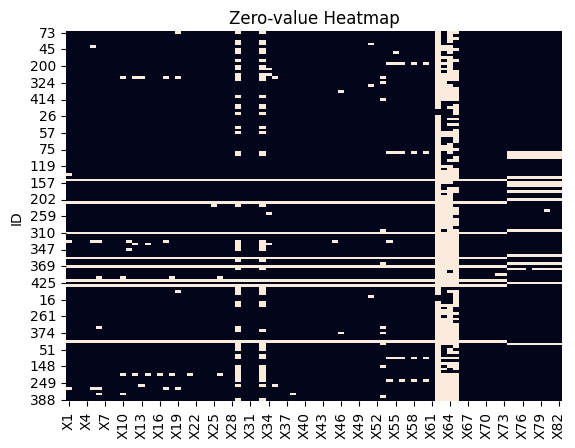

In [80]:
print("zeros per feature:")
# print((data == 0).sum(axis=0))

print(f"average zeros per feature: {(data == 0).sum(axis=0).mean():.2f}")

print("\n")

print("Features with most missing values:")
print((data == 0).sum(axis=0).sort_values(ascending=False).head(10))

sns.heatmap((data.drop("S", axis=1) == 0), cbar=False)
plt.title("Zero-value Heatmap")
plt.show()


In [83]:
print("zeros per sample:")
# print((data == 0).sum(axis=1))

print(f"average zeros per sample: {(data == 0).sum(axis=1).mean():.2f}")

print("\n")

print("Samples with most missing values:")
print((data == 0).sum(axis=1).sort_values(ascending=False).head(10))


zeros per sample:
average zeros per sample: 9.51


Samples with most missing values:
ID
150    73
369    73
407    73
449    73
7      73
310    73
352    73
203    73
76     18
372    16
dtype: int64


There's a lot of missing values, almost 12% of values are missing.

When looking at specific features the average missing values per feature is around 15, but there's a few features like X62, x64, x65, x63 that have a lot of them and might be better left out when training.

When looking at the rows there's also 8 samples that are missing almost all of their features and might be best dropped.

## Target feature balance

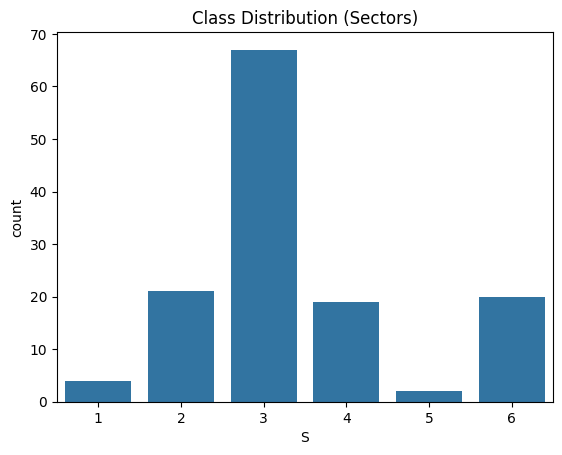

In [77]:
data['S'].value_counts(normalize=True) * 100

sns.countplot(x="S", data=data)
plt.title("Class Distribution (Sectors)")
plt.show()

Another big problem that is quickly found is that there's a huge imbalance in the distribution of the samples per target feature. Sector 3 has half of the examples, while sector 2, 6 and 4 all share 15% of the samples .

Sector 1 and 5 only have 3 and 1.5% of the samples respectively which might pose a problem.

## Checking correlations

Now let's see if any of the values are very closely related, I expect a lot of them might be because some monetary values might be directly related

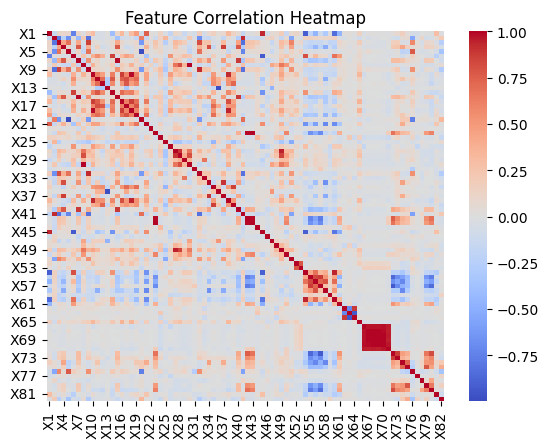

In [86]:
corr = data.drop("S", axis=1).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [98]:
# Get top 25 correlations (excluding self-correlations)
import numpy as np

# Create upper triangle mask (excluding diagonal) this makes it so we don't count self-correlations or duplicate pairs. In the visual this means it shows only everything above the diagonal red line
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
corr_pairs = corr.where(mask).stack().sort_values(key=abs, ascending=False)

print("Top 25 highest correlations:")
for i, (pair, corr_val) in enumerate(corr_pairs.head(25).items()):
    print(f"{i+1:2d}. {pair[0]} <-> {pair[1]}: {corr_val:.3f}")


Top 25 highest correlations:
 1. X23 <-> X43: 1.000
 2. X8 <-> X30: 0.999
 3. X68 <-> X69: 0.999
 4. X68 <-> X70: 0.997
 5. X5 <-> X20: -0.997
 6. X67 <-> X69: 0.997
 7. X69 <-> X70: 0.996
 8. X67 <-> X68: 0.995
 9. X23 <-> X42: 0.991
10. X42 <-> X43: 0.991
11. X67 <-> X70: 0.989
12. X7 <-> X15: 0.989
13. X10 <-> X18: 0.987
14. X13 <-> X36: -0.986
15. X66 <-> X70: 0.982
16. X66 <-> X68: 0.974
17. X66 <-> X69: 0.974
18. X66 <-> X67: 0.969
19. X70 <-> X71: 0.961
20. X66 <-> X71: 0.958
21. X68 <-> X71: 0.954
22. X69 <-> X71: 0.953
23. X63 <-> X64: -0.947
24. X67 <-> X71: 0.946
25. X27 <-> X49: 0.945


## Conclusion from analysis

There's serveral things important to consider when preparing the data, choosing my model, performance metric and models to train. The most important considerations are as follow:

- The samples are very imbalanced, with one sector being slightly more than half of all ocurances. And the 2 least found sector being less than 5% combined.
- There's quite a lot of missing values that have to be dealt with
- The data has quite a few features with correlations that are very high, X71 for example has 4 other features that it has a correlation of roughly 0.95 with. Meaning that this needs to be dealt with in the data. Or a model has to be used that can use this data without becoming biased to those features.


#### Used resources
- [Feature selection](https://neptune.ai/blog/feature-selection-methods)
- [What is Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity)
- [Principal component analysis](https://towardsdatascience.com/too-many-features-lets-look-at-principal-component-analysis-62504b791ae9/)

- [Modal selection chart sklearn](https://scikit-learn.org/stable/machine_learning_map.html)
- [Model selection help article 1](https://www.ibm.com/think/topics/model-selection)
- [Model selection help article 2](https://www.devoteam.com/expert-view/a-practical-guide-to-machine-learning-model-selection/)





## TODO data preparation

- For the rows with lots of values missing drop them,
- For the rows with few values missing use mean or average and argue why i chose which one
- Use PCA to reduce dimensionality for the really strong correlations

#### Deel B

Wat zou je als nulmodel kiezen en waarom? Welke prestatiemaat gebruik je om je modellen te beoordelen, waarom? Hoe scoort je nulmodel op deze prestatiemaat?

Houd je antwoord kort en bondig.

In [ ]:
# Jouw code hier, voeg indien gewenst extra code cellen toe

## Reasoning

For my data set and purpose the main issue is the class imbalance, I want to choose a nul model suitable and performance metric that will help me evaluate my problem properly and not make it seem like my model is performing properly because it ends up choosing the big sectors and thus seeming like it performs well. While ignoring the small sectors.

For this reason my choice is to use the stratified classifier, it predicts the classes at random but in propotion to their frequency which makes it a fair baseline for my imbalanced set because it would reflect the nature of the data while still considering that the model could have some variance in it's predictions. I chose this over the more uniform models like using majority class which would ignore the minority performance, a uniform model that would ignore frequencies and an empirical probability model which would suit probabilistic metrics but not hard label evaluation.

Using imperical probability could be useful if I cared about the probabilities of the predictions but for my problem it makes more sense to focus on the actual predictions since it's straight forward classification. And the chance of it being a certain sector wouldn't be very interesting.

For the performance metric I want to use Macro-F1. Where as accuracy, or micro F1 would be dominated by the majority classes. The Macro F1 average considers all classes equally ensuring the minority sectors can be considered properly and evaluated and inspected more easily. Weighted F1 would have been an option but would also downplay smaller classes. I also looked at ROC-AUC but after reading the resources those seemed better suited for binary or probablistic evaluations.

Another bonus of the Macro-F1 is that I can use it to make a confusion matrix more easily for each of my 6 sectors. So it's easier to identify if any of the specific sectors is being wrong predicted often, or if one of the sectors is wrongly not predicted.

#### Used resources:

- [Information about dummy classifiers](https://medium.com/@eskandar.sahel/a-dummy-classifier-a-baseline-classifier-or-a-null-model-71df50fd8947)
- [What is log loss](https://www.kaggle.com/code/dansbecker/what-is-log-loss)
- [Performance metrics](https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide)
- [Performance metrics 2](https://codefinity.com/blog/How-to-Choose-the-Right-Metric-for-Your-Model)
- [What are ROC Curve and AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)
- [Different F1 scores](https://www.kdnuggets.com/2023/01/micro-macro-weighted-averages-f1-score-clearly-explained.html)


#### Deel C

Stel, onder andere aan de hand van je antwoorden in deel A en B, een korte lijst van *requirements* op. Waar moet je model minimaal aan voldoen. Licht gemaakte keuzes kort en bondig toe.

> Jouw antwoord hier

#### Deel D

Kies een model dat je wilt gebruiken. Zie https://scikit-learn.org/stable/supervised_learning.html voor een overzicht van beschikbare modellen in **sklearn**. 

Licht kort toe welk model je hebt gekozen en waarom, welke hyperparameterkeuzes voor dit model van belang zijn, wat geschikte waardes voor deze hyperparameters zijn en/of wat de gebruikelijke methodes zijn om deze parameters te tunen.

**Opmerking:** Het gaat hier voornamelijk om je argumentatie en correct gebruik van technieken, het is niet de bedoeling dat je eindeloos lang door blijft modelleren om het *beste* model te vinden.

> Jouw antwoord hier

#### Deel E

Fit je model en bepaal hyperparameterkeuzes.

In [ ]:
# Jouw code hier, voeg indien gewenst extra code cellen toe

Licht eventueel hyperparameterkeuzes kort verder toe.

> Jouw antwoord hier

#### Deel F

Beoordeel je model. Bespreek de kwaliteit van je model, en licht gemaakte fouten van het model toe.

In [ ]:
# Jouw code hier, voeg indien gewenst extra code cellen toe

> Jouw antwoord hier